In [118]:
import pandas as pd


pd.set_option('display.max_rows', None)
input_file_name = '.\input\data.csv'
input_df = pd.read_csv(input_file_name)
input_df.DateTime = pd.to_datetime(input_df.DateTime, format='%Y-%m-%dT%H:%M:%S')
mindate = input_df.DateTime.min()
input_df['total_seconds'] = (input_df.DateTime-mindate).dt.total_seconds()
input_df.head()


,DateTime,LatencyUs,BufferSize,CallerName,AllocatedBytes,total_seconds
0,2021-05-04 11:49:21,860.0,0,DoAppend,548848,0.0
1,2021-05-04 11:49:21,846.8,0,DoAppend,548848,0.0
2,2021-05-04 11:49:21,881.7,0,DoAppend,548848,0.0
3,2021-05-04 11:49:21,869.0,0,DoAppend,548848,0.0
4,2021-05-04 11:49:21,889.3,0,DoAppend,548848,0.0


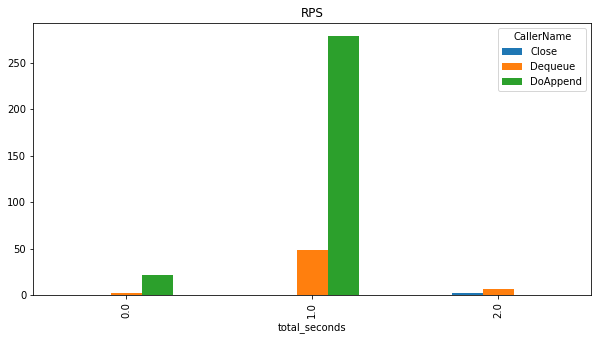

In [92]:
input_df.groupby(by=['total_seconds','CallerName']).size().unstack(level=-1).plot(figsize=(10,5), kind="bar", title='RPS')

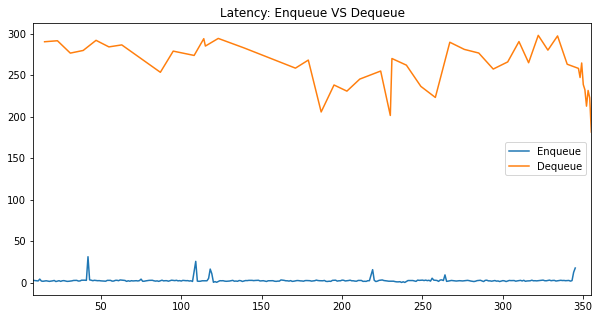

In [124]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = input_df.loc[(input_df.CallerName == 'DoAppend') & (input_df.LatencyUs <= input_df.LatencyUs.quantile(0.95))].LatencyUs.plot(figsize=(10,5), title='Latency: Enqueue VS Dequeue')
input_df.loc[(input_df.CallerName == 'Dequeue') & (input_df.LatencyUs <= input_df.LatencyUs.quantile(0.95))].LatencyUs.plot()
ax.legend(["Enqueue", "Dequeue"])

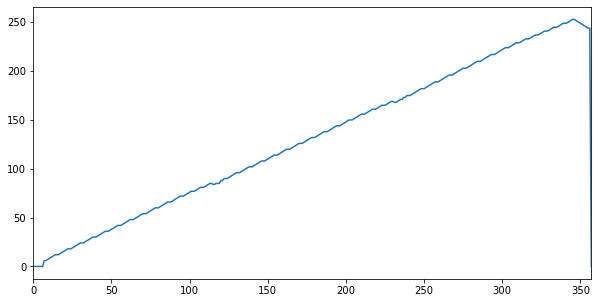

In [10]:
input_df.BufferSize.plot(figsize=(10,5))

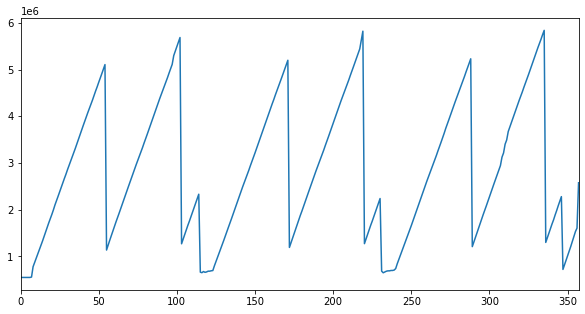

In [11]:
input_df.AllocatedBytes.plot(figsize=(10,5))